# Overview
This jupyter notebook contains the code used to compute the recommendations made in the google doc called KevinLuo_Plan_for_Webb. The structure of the notebook is like this:
1. [Load Data](#Load-Data)
2. [Logan's Two Strike Frequency](#Logan's-Two-Strike-Frequency)
2. [Pitch Performance by Zone Height](#Pitch-Performance-by-Zone-Height)
3. [Release Point Analysis](#Release-Point-Analysis)

Additionally, I factored out much of the code functionality into individual functions placed in loganwebb_utils.py. Any function not defined in this notebook is defined in loganwebb_utils.py.

To run this notebook, you need to have the pybaseball library installed. To do this, simply run the following command: `pip install pybaseball`. Documentation for this library is [here](https://github.com/jldbc/pybaseball).

In [1]:
import matplotlib.pyplot as plt
from pybaseball import statcast, statcast_pitcher

from loganwebb_utils import *

## Load Data
I use the pybaseball library to scrape statcast/baseball savant. I begin by separately loading Logan Webb's info and then the info of all pitchers in 2020.

In [2]:
webb_stats = statcast_pitcher('2020-05-01', '2020-11-01', 657277)
webb_stats_2019 =  statcast_pitcher('2019-08-16', '2019-09-26', 657277)

Gathering Player Data
Gathering Player Data


In [3]:
# might take 3 minutes or so
all_stats = statcast(start_dt='2020-07-22', end_dt='2020-11-01')

This is a large query, it may take a moment to complete
Completed sub-query from 2020-07-22 to 2020-07-27
Completed sub-query from 2020-07-28 to 2020-08-02
Completed sub-query from 2020-08-03 to 2020-08-08
Completed sub-query from 2020-08-09 to 2020-08-14
Completed sub-query from 2020-08-15 to 2020-08-20
Completed sub-query from 2020-08-21 to 2020-08-26
Completed sub-query from 2020-08-27 to 2020-09-01
Completed sub-query from 2020-09-02 to 2020-09-07
Completed sub-query from 2020-09-08 to 2020-09-13
Completed sub-query from 2020-09-14 to 2020-09-19
Completed sub-query from 2020-09-20 to 2020-09-25
Completed sub-query from 2020-09-26 to 2020-10-01
Completed sub-query from 2020-10-02 to 2020-10-07
Completed sub-query from 2020-10-08 to 2020-10-13
Completed sub-query from 2020-10-14 to 2020-10-19
Completed sub-query from 2020-10-20 to 2020-10-25
Completed sub-query from 2020-10-26 to 2020-10-31
Completed sub-query from 2020-11-01 to 2020-11-01


In [4]:
# Take a look at the features available
webb_stats.columns

Index(['pitch_type', 'game_date', 'release_speed', 'release_pos_x',
       'release_pos_z', 'player_name', 'batter', 'pitcher', 'events',
       'description', 'spin_dir', 'spin_rate_deprecated',
       'break_angle_deprecated', 'break_length_deprecated', 'zone', 'des',
       'game_type', 'stand', 'p_throws', 'home_team', 'away_team', 'type',
       'hit_location', 'bb_type', 'balls', 'strikes', 'game_year', 'pfx_x',
       'pfx_z', 'plate_x', 'plate_z', 'on_3b', 'on_2b', 'on_1b',
       'outs_when_up', 'inning', 'inning_topbot', 'hc_x', 'hc_y',
       'tfs_deprecated', 'tfs_zulu_deprecated', 'fielder_2', 'umpire', 'sv_id',
       'vx0', 'vy0', 'vz0', 'ax', 'ay', 'az', 'sz_top', 'sz_bot',
       'hit_distance_sc', 'launch_speed', 'launch_angle', 'effective_speed',
       'release_spin_rate', 'release_extension', 'game_pk', 'pitcher.1',
       'fielder_2.1', 'fielder_3', 'fielder_4', 'fielder_5', 'fielder_6',
       'fielder_7', 'fielder_8', 'fielder_9', 'release_pos_y',
       'estima

In [5]:
webb_stats['xwoba_value'] = webb_stats.apply(parse_xwoba, axis=1)
all_stats['xwoba_value'] = all_stats.apply(parse_xwoba, axis=1)

## Logan's Two Strike Frequency
Logan didn't use his slider in two-strike counts as much as he did in 2019. But the slider could be the better strikeout pitch.

In [6]:
calls_by_pitch = webb_stats.groupby('pitch_type')
webb_stats_2str = webb_stats[webb_stats['strikes']==2]
print('Pitch frequency during two strikes (2020):')
calls_by_pitch.apply(parse_prop, df=webb_stats_2str)

Pitch frequency during two strikes (2020):


pitch_type
CH    0.350340
FC    0.010204
FF    0.343537
SI    0.095238
SL    0.200680
dtype: float64

In [7]:
calls_by_pitch_2019 = webb_stats_2019.groupby('pitch_type')
webb_stats_2str_2019 = webb_stats_2019[webb_stats_2019['strikes']==2]
print('Pitch frequency during two strikes (2019):')
calls_by_pitch_2019.apply(parse_prop, df=webb_stats_2str_2019)

Pitch frequency during two strikes (2019):


pitch_type
CH    0.236486
FF    0.344595
FT    0.081081
SL    0.337838
dtype: float64

## Pitch Performance by Zone Height
Below, I take a brief look at how each of Logan's pitches does by location. Blue dots are the pitches which qualify, purple dots are the swings, orange dots are whiffs.


INFO FOR FF at (-100, 2.2)
FF clean rate: 0.15789473684210525
FF whiff rate: 0.125
FF whiffs: 1
FF called strikes: 2
FF swings: 8
FF strikes: 10
FF chances: 19


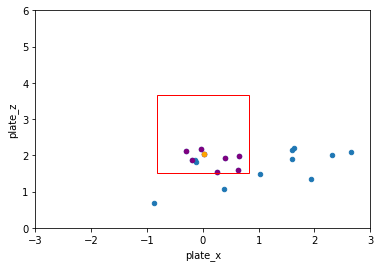


INFO FOR FF at (2.2, 2.8)
FF clean rate: 0.06896551724137931
FF whiff rate: 0.09090909090909091
FF whiffs: 2
FF called strikes: 0
FF swings: 22
FF strikes: 16
FF chances: 29


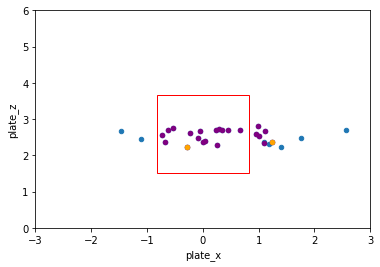


INFO FOR FF at (2.8, 100)
FF clean rate: 0.1509433962264151
FF whiff rate: 0.23333333333333334
FF whiffs: 7
FF called strikes: 1
FF swings: 30
FF strikes: 29
FF chances: 53


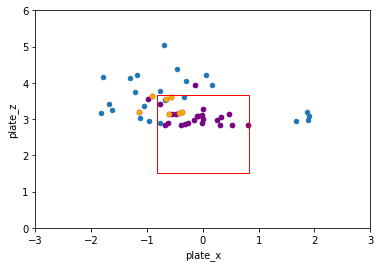

frequencies for FF by height: {(-100, 2.2): 0.18811881188118812, (2.2, 2.8): 0.2871287128712871, (2.8, 100): 0.5247524752475248}

INFO FOR CH at (-100, 2.2)
CH clean rate: 0.16901408450704225
CH whiff rate: 0.23076923076923078
CH whiffs: 9
CH called strikes: 3
CH swings: 39
CH strikes: 23
CH chances: 71


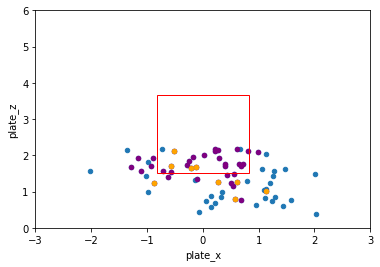


INFO FOR CH at (2.2, 2.8)
CH clean rate: 0.12
CH whiff rate: 0.05263157894736842
CH whiffs: 1
CH called strikes: 2
CH swings: 19
CH strikes: 16
CH chances: 25


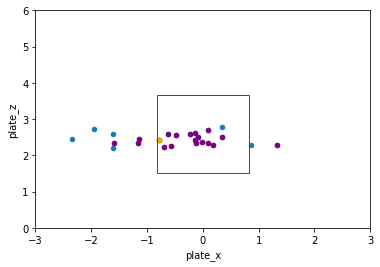


INFO FOR CH at (2.8, 100)
CH clean rate: 0.14285714285714285
CH whiff rate: 0.0
CH whiffs: 0
CH called strikes: 1
CH swings: 1
CH strikes: 3
CH chances: 7


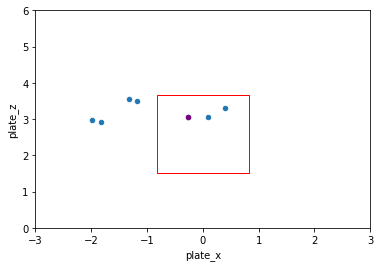

frequencies for CH by height: {(-100, 2.2): 0.6893203883495146, (2.2, 2.8): 0.24271844660194175, (2.8, 100): 0.06796116504854369}

INFO FOR SL at (-100, 2.2)
SL clean rate: 0.13725490196078433
SL whiff rate: 0.1875
SL whiffs: 3
SL called strikes: 4
SL swings: 16
SL strikes: 10
SL chances: 51


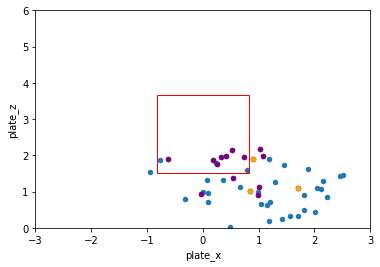


INFO FOR SL at (2.2, 2.8)
SL clean rate: 0.5
SL whiff rate: 0.3333333333333333
SL whiffs: 1
SL called strikes: 2
SL swings: 3
SL strikes: 5
SL chances: 6


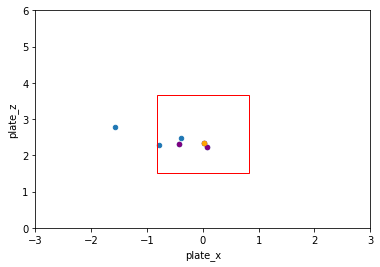


INFO FOR SL at (2.8, 100)
SL clean rate: 0.0
SL whiff rate: 0.0
SL whiffs: 0
SL called strikes: 0
SL swings: 1
SL strikes: 1
SL chances: 2


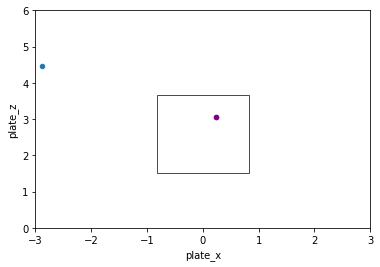

frequencies for SL by height: {(-100, 2.2): 0.864406779661017, (2.2, 2.8): 0.1016949152542373, (2.8, 100): 0.03389830508474576}

INFO FOR SI at (-100, 2.2)
SI clean rate: 0.0
SI whiff rate: 0.0
SI whiffs: 0
SI called strikes: 0
SI swings: 8
SI strikes: 5
SI chances: 10


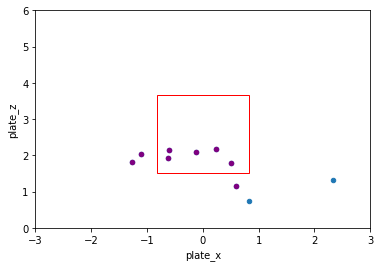


INFO FOR SI at (2.2, 2.8)
SI clean rate: 0.09090909090909091
SI whiff rate: 0.1
SI whiffs: 1
SI called strikes: 0
SI swings: 10
SI strikes: 9
SI chances: 11


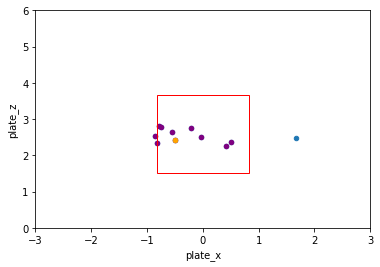


INFO FOR SI at (2.8, 100)
SI clean rate: 0.14285714285714285
SI whiff rate: 0.0
SI whiffs: 0
SI called strikes: 1
SI swings: 5
SI strikes: 5
SI chances: 7


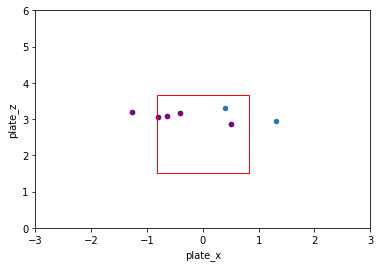

frequencies for SI by height: {(-100, 2.2): 0.35714285714285715, (2.2, 2.8): 0.39285714285714285, (2.8, 100): 0.25}


In [8]:
# look at 2-strike pitches exclusively from Logan 2020
heights = [(-100, 2.2), (2.2, 2.8), (2.8, 100)]
whiff_by_height(['FF', 'CH', 'SL', 'SI'], webb_stats[webb_stats['strikes']==2], heights)


INFO FOR FF at (-100, 2.2)
FF clean rate: 0.32967032967032966
FF whiff rate: 0.041666666666666664
FF whiffs: 1
FF called strikes: 29
FF swings: 24
FF strikes: 48
FF chances: 91


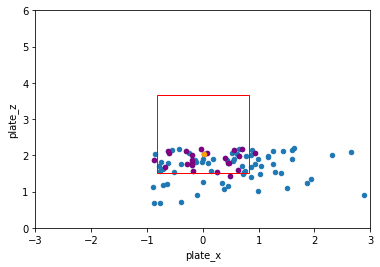


INFO FOR FF at (2.2, 2.8)
FF clean rate: 0.31868131868131866
FF whiff rate: 0.13725490196078433
FF whiffs: 7
FF called strikes: 22
FF swings: 51
FF strikes: 61
FF chances: 91


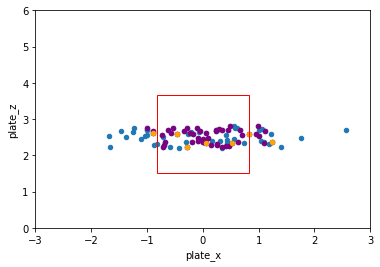


INFO FOR FF at (2.8, 100)
FF clean rate: 0.2532467532467532
FF whiff rate: 0.28125
FF whiffs: 18
FF called strikes: 21
FF swings: 64
FF strikes: 84
FF chances: 154


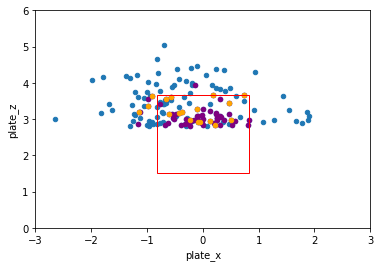

frequencies for FF by height: {(-100, 2.2): 0.2708333333333333, (2.2, 2.8): 0.2708333333333333, (2.8, 100): 0.4583333333333333}

INFO FOR CH at (-100, 2.2)
CH clean rate: 0.27586206896551724
CH whiff rate: 0.3302752293577982
CH whiffs: 36
CH called strikes: 20
CH swings: 109
CH strikes: 77
CH chances: 203


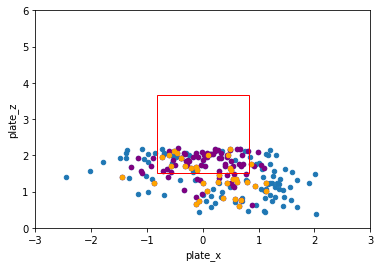


INFO FOR CH at (2.2, 2.8)
CH clean rate: 0.3333333333333333
CH whiff rate: 0.11428571428571428
CH whiffs: 4
CH called strikes: 18
CH swings: 35
CH strikes: 46
CH chances: 66


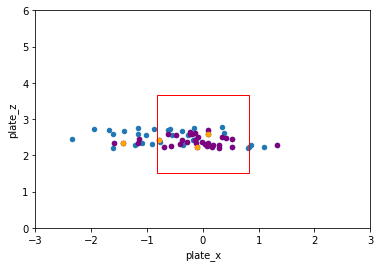


INFO FOR CH at (2.8, 100)
CH clean rate: 0.23684210526315788
CH whiff rate: 0.0
CH whiffs: 0
CH called strikes: 9
CH swings: 4
CH strikes: 16
CH chances: 38


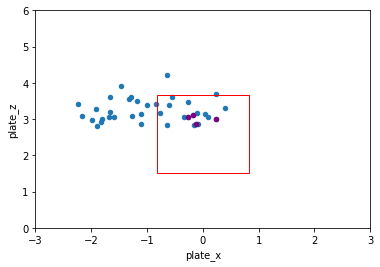

frequencies for CH by height: {(-100, 2.2): 0.6612377850162866, (2.2, 2.8): 0.21498371335504887, (2.8, 100): 0.1237785016286645}

INFO FOR SL at (-100, 2.2)
SL clean rate: 0.22115384615384615
SL whiff rate: 0.26666666666666666
SL whiffs: 8
SL called strikes: 15
SL swings: 30
SL strikes: 27
SL chances: 104


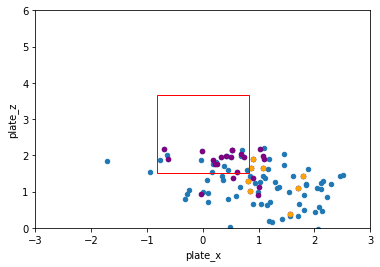


INFO FOR SL at (2.2, 2.8)
SL clean rate: 0.5714285714285714
SL whiff rate: 0.35714285714285715
SL whiffs: 5
SL called strikes: 15
SL swings: 14
SL strikes: 27
SL chances: 35


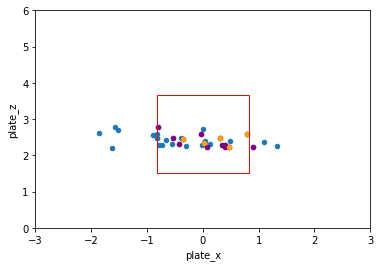


INFO FOR SL at (2.8, 100)
SL clean rate: 0.21428571428571427
SL whiff rate: 0.0
SL whiffs: 0
SL called strikes: 3
SL swings: 2
SL strikes: 7
SL chances: 14


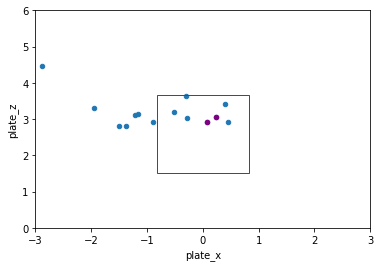

frequencies for SL by height: {(-100, 2.2): 0.6797385620915033, (2.2, 2.8): 0.22875816993464052, (2.8, 100): 0.0915032679738562}

INFO FOR SI at (-100, 2.2)
SI clean rate: 0.19696969696969696
SI whiff rate: 0.10714285714285714
SI whiffs: 3
SI called strikes: 10
SI swings: 28
SI strikes: 29
SI chances: 66


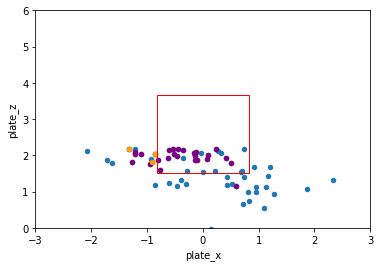


INFO FOR SI at (2.2, 2.8)
SI clean rate: 0.40425531914893614
SI whiff rate: 0.08333333333333333
SI whiffs: 2
SI called strikes: 17
SI swings: 24
SI strikes: 33
SI chances: 47


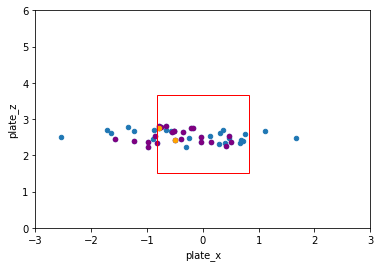


INFO FOR SI at (2.8, 100)
SI clean rate: 0.1388888888888889
SI whiff rate: 0.0
SI whiffs: 0
SI called strikes: 5
SI swings: 12
SI strikes: 18
SI chances: 36


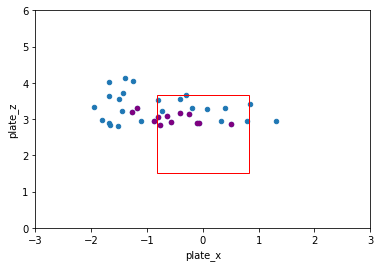

frequencies for SI by height: {(-100, 2.2): 0.4429530201342282, (2.2, 2.8): 0.31543624161073824, (2.8, 100): 0.24161073825503357}


In [9]:
# look at all pitches from Logan 2020
heights = [(-100, 2.2), (2.2, 2.8), (2.8, 100)]
whiff_by_height(['FF', 'CH', 'SL', 'SI'], webb_stats, heights)

Below is for all pitchers: 


INFO FOR FF at (-100, 2.2)
FF clean rate: 0.31606875072095975
FF whiff rate: 0.1168975754576942
FF whiffs: 945
FF called strikes: 7275
FF swings: 8084
FF strikes: 13035
FF chances: 26007


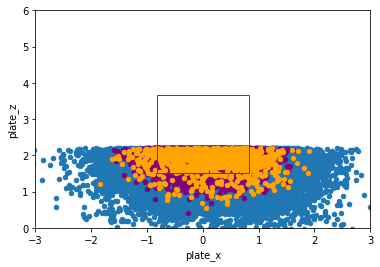


INFO FOR FF at (2.2, 2.8)
FF clean rate: 0.31303083633024714
FF whiff rate: 0.14145559474190444
FF whiffs: 2206
FF called strikes: 5976
FF swings: 15595
FF strikes: 18979
FF chances: 26138


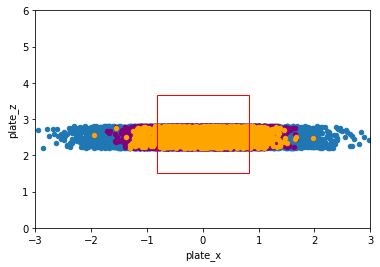


INFO FOR FF at (2.8, 100)
FF clean rate: 0.2283386189495127
FF whiff rate: 0.27822541500825165
FF whiffs: 5732
FF called strikes: 4132
FF swings: 20602
FF strikes: 22438
FF chances: 43199


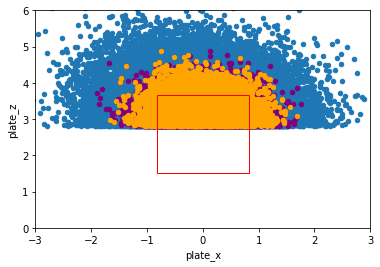

frequencies for FF by height: {(-100, 2.2): 0.2727701795603289, (2.2, 2.8): 0.2741441517033059, (2.8, 100): 0.4530856687363652}

INFO FOR CH at (-100, 2.2)
CH clean rate: 0.26603841971728887
CH whiff rate: 0.3629768941429339
CH whiffs: 4053
CH called strikes: 1819
CH swings: 11166
CH strikes: 7072
CH chances: 22072


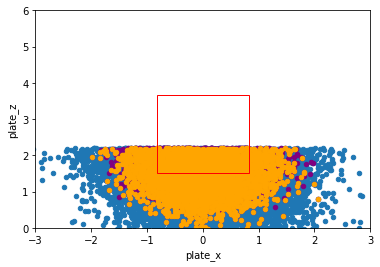


INFO FOR CH at (2.2, 2.8)
CH clean rate: 0.26166720308979724
CH whiff rate: 0.17330626744481095
CH whiffs: 683
CH called strikes: 943
CH swings: 3941
CH strikes: 3771
CH chances: 6214


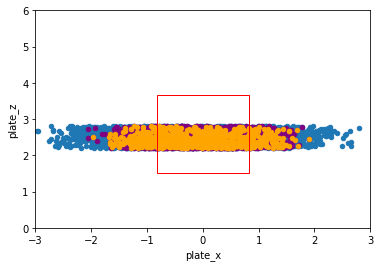


INFO FOR CH at (2.8, 100)
CH clean rate: 0.20951068228807718
CH whiff rate: 0.18613138686131386
CH whiffs: 255
CH called strikes: 657
CH swings: 1370
CH strikes: 1750
CH chances: 4353


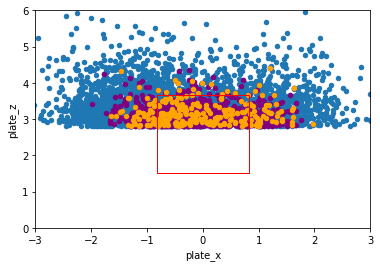

frequencies for CH by height: {(-100, 2.2): 0.6762462085235454, (2.2, 2.8): 0.19038573485707283, (2.8, 100): 0.13336805661938173}

INFO FOR SL at (-100, 2.2)
SL clean rate: 0.298774712011489
SL whiff rate: 0.43627385559855864
SL whiffs: 6538
SL called strikes: 3240
SL swings: 14986
SL strikes: 9721
SL chances: 32727


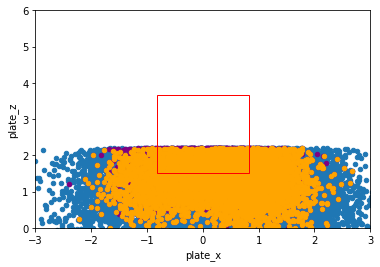


INFO FOR SL at (2.2, 2.8)
SL clean rate: 0.3422525180588056
SL whiff rate: 0.1573544261191518
SL whiffs: 935
SL called strikes: 2429
SL swings: 5942
SL strikes: 7157
SL chances: 9829


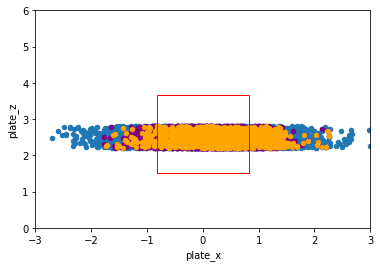


INFO FOR SL at (2.8, 100)
SL clean rate: 0.33235867446393763
SL whiff rate: 0.25906526994359386
SL whiffs: 643
SL called strikes: 1744
SL swings: 2482
SL strikes: 4418
SL chances: 7182


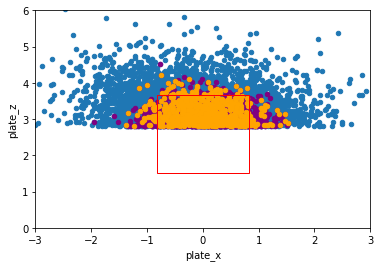

frequencies for SL by height: {(-100, 2.2): 0.657987856367365, (2.2, 2.8): 0.19761550524749688, (2.8, 100): 0.14439663838513814}

INFO FOR SI at (-100, 2.2)
SI clean rate: 0.2747600721001608
SI whiff rate: 0.1452839756592292
SI whiffs: 1146
SI called strikes: 4494
SI swings: 7888
SI strikes: 9267
SI chances: 20527


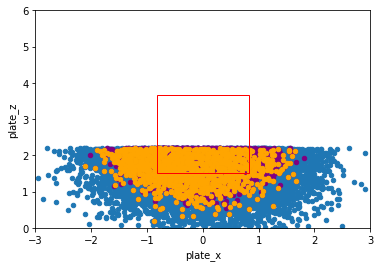


INFO FOR SI at (2.2, 2.8)
SI clean rate: 0.2816276579470705
SI whiff rate: 0.09414858645627876
SI whiffs: 716
SI called strikes: 2966
SI swings: 7605
SI strikes: 8651
SI chances: 13074


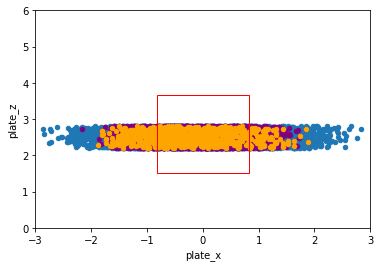


INFO FOR SI at (2.8, 100)
SI clean rate: 0.23349436392914655
SI whiff rate: 0.20233715645964076
SI whiffs: 935
SI called strikes: 1820
SI swings: 4621
SI strikes: 5978
SI chances: 11799


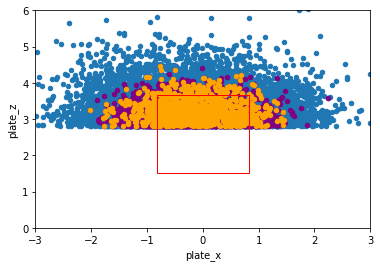

frequencies for SI by height: {(-100, 2.2): 0.45213656387665196, (2.2, 2.8): 0.2879735682819383, (2.8, 100): 0.2598898678414097}


In [10]:
# all pitches in 2020 from all pitchers
heights = [(-100, 2.2), (2.2, 2.8), (2.8, 100)]
whiff_by_height(['FF', 'CH', 'SL', 'SI'], all_stats, heights)

Now, I look at Logan's 2019:

In [11]:
print("Number of 2020 pitches: " + str(len(webb_stats)))
print("Number of 2019 pitches: " + str(len(webb_stats_2019)))

Number of 2020 pitches: 998
Number of 2019 pitches: 586


In [12]:
set(webb_stats_2019['pitch_type'])

{'CH', 'FF', 'FT', 'SL'}


INFO FOR FF at (-100, 2.2)
FF clean rate: 0.26436781609195403
FF whiff rate: 0.05555555555555555
FF whiffs: 1
FF called strikes: 22
FF swings: 18
FF strikes: 36
FF chances: 87


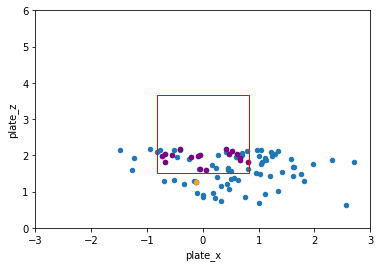


INFO FOR FF at (2.2, 2.8)
FF clean rate: 0.28205128205128205
FF whiff rate: 0.05555555555555555
FF whiffs: 2
FF called strikes: 20
FF swings: 36
FF strikes: 42
FF chances: 78


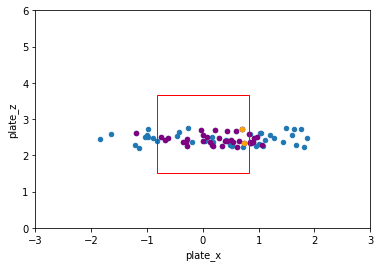


INFO FOR FF at (2.8, 100)
FF clean rate: 0.20689655172413793
FF whiff rate: 0.2
FF whiffs: 9
FF called strikes: 9
FF swings: 45
FF strikes: 48
FF chances: 87


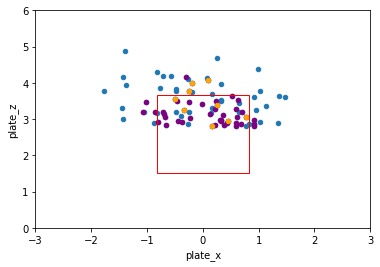

frequencies for FF by height: {(-100, 2.2): 0.34523809523809523, (2.2, 2.8): 0.30952380952380953, (2.8, 100): 0.34523809523809523}

INFO FOR CH at (-100, 2.2)
CH clean rate: 0.3
CH whiff rate: 0.43902439024390244
CH whiffs: 18
CH called strikes: 6
CH swings: 41
CH strikes: 30
CH chances: 80


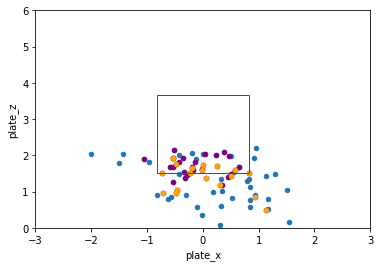


INFO FOR CH at (2.2, 2.8)
CH clean rate: 0.24
CH whiff rate: 0.0
CH whiffs: 0
CH called strikes: 6
CH swings: 13
CH strikes: 12
CH chances: 25


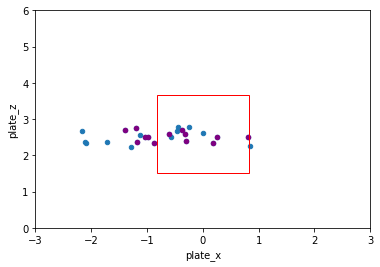


INFO FOR CH at (2.8, 100)
CH clean rate: 0.14285714285714285
CH whiff rate: 0.0
CH whiffs: 0
CH called strikes: 2
CH swings: 5
CH strikes: 5
CH chances: 14


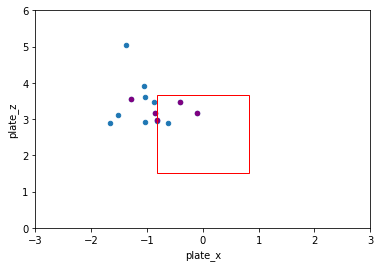

frequencies for CH by height: {(-100, 2.2): 0.6722689075630253, (2.2, 2.8): 0.21008403361344538, (2.8, 100): 0.11764705882352941}

INFO FOR SL at (-100, 2.2)
SL clean rate: 0.2987012987012987
SL whiff rate: 0.43243243243243246
SL whiffs: 16
SL called strikes: 7
SL swings: 37
SL strikes: 19
SL chances: 77


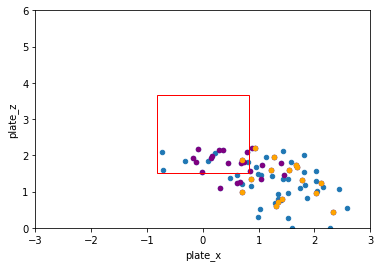


INFO FOR SL at (2.2, 2.8)
SL clean rate: 0.4722222222222222
SL whiff rate: 0.11764705882352941
SL whiffs: 2
SL called strikes: 15
SL swings: 17
SL strikes: 26
SL chances: 36


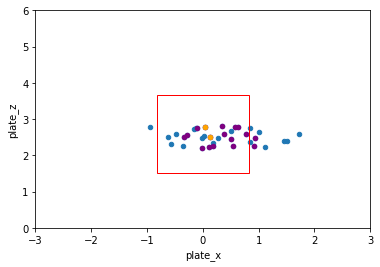


INFO FOR SL at (2.8, 100)
SL clean rate: 0.375
SL whiff rate: 0.2857142857142857
SL whiffs: 2
SL called strikes: 7
SL swings: 7
SL strikes: 17
SL chances: 24


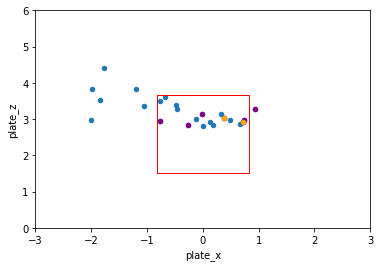

frequencies for SL by height: {(-100, 2.2): 0.5620437956204379, (2.2, 2.8): 0.26277372262773724, (2.8, 100): 0.17518248175182483}

INFO FOR FT at (-100, 2.2)
FT clean rate: 0.17391304347826086
FT whiff rate: 0.1875
FT whiffs: 3
FT called strikes: 5
FT swings: 16
FT strikes: 16
FT chances: 46


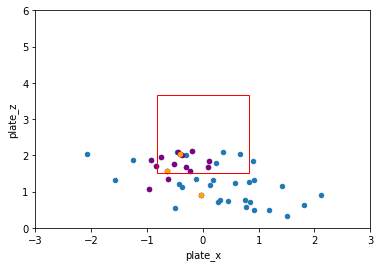


INFO FOR FT at (2.2, 2.8)
FT clean rate: 0.23529411764705882
FT whiff rate: 0.0
FT whiffs: 0
FT called strikes: 4
FT swings: 10
FT strikes: 12
FT chances: 17


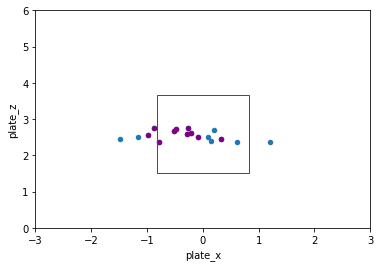


INFO FOR FT at (2.8, 100)
FT clean rate: 0.26666666666666666
FT whiff rate: 0.0
FT whiffs: 0
FT called strikes: 4
FT swings: 7
FT strikes: 10
FT chances: 15


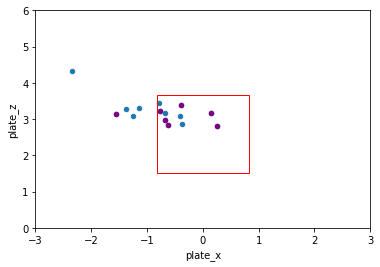

frequencies for FT by height: {(-100, 2.2): 0.5897435897435898, (2.2, 2.8): 0.21794871794871795, (2.8, 100): 0.19230769230769232}


In [13]:
# all pitches in 2019
heights = [(-100, 2.2), (2.2, 2.8), (2.8, 100)]
whiff_by_height(['FF', 'CH', 'SL', 'FT'], webb_stats_2019, heights)


INFO FOR FF at (-100, 2.2)
FF clean rate: 0.1111111111111111
FF whiff rate: 0.0
FF whiffs: 0
FF called strikes: 1
FF swings: 3
FF strikes: 3
FF chances: 9


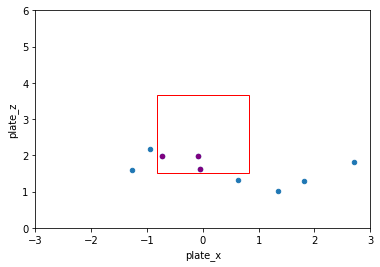


INFO FOR FF at (2.2, 2.8)
FF clean rate: 0.0625
FF whiff rate: 0.0
FF whiffs: 0
FF called strikes: 1
FF swings: 13
FF strikes: 8
FF chances: 16


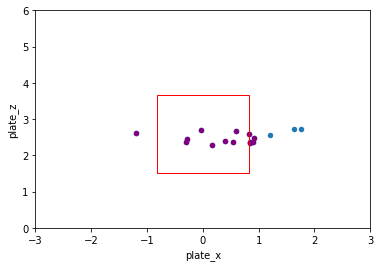


INFO FOR FF at (2.8, 100)
FF clean rate: 0.15384615384615385
FF whiff rate: 0.21052631578947367
FF whiffs: 4
FF called strikes: 0
FF swings: 19
FF strikes: 14
FF chances: 26


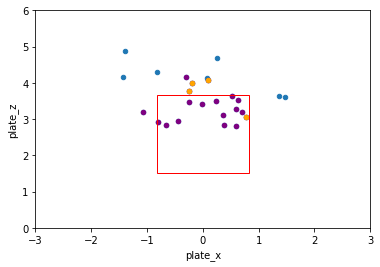

frequencies for FF by height: {(-100, 2.2): 0.17647058823529413, (2.2, 2.8): 0.3137254901960784, (2.8, 100): 0.5098039215686274}

INFO FOR CH at (-100, 2.2)
CH clean rate: 0.3076923076923077
CH whiff rate: 0.5333333333333333
CH whiffs: 8
CH called strikes: 0
CH swings: 15
CH strikes: 9
CH chances: 26


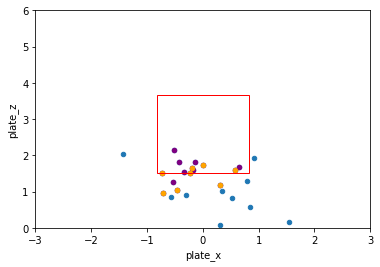


INFO FOR CH at (2.2, 2.8)
CH clean rate: 0.0
CH whiff rate: 0.0
CH whiffs: 0
CH called strikes: 0
CH swings: 5
CH strikes: 3
CH chances: 7


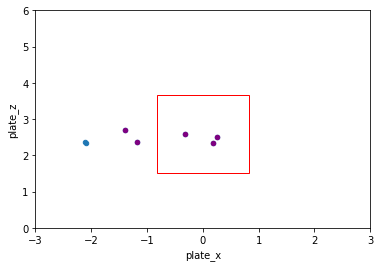


INFO FOR CH at (2.8, 100)
CH clean rate: 0.0
CH whiff rate: 0.0
CH whiffs: 0
CH called strikes: 0
CH swings: 2
CH strikes: 1
CH chances: 2


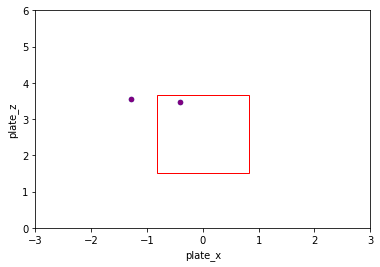

frequencies for CH by height: {(-100, 2.2): 0.7428571428571429, (2.2, 2.8): 0.2, (2.8, 100): 0.05714285714285714}

INFO FOR SL at (-100, 2.2)
SL clean rate: 0.25
SL whiff rate: 0.45454545454545453
SL whiffs: 10
SL called strikes: 0
SL swings: 22
SL strikes: 8
SL chances: 40


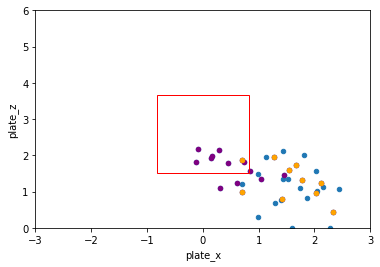


INFO FOR SL at (2.2, 2.8)
SL clean rate: 0.5
SL whiff rate: 0.0
SL whiffs: 0
SL called strikes: 3
SL swings: 3
SL strikes: 5
SL chances: 6


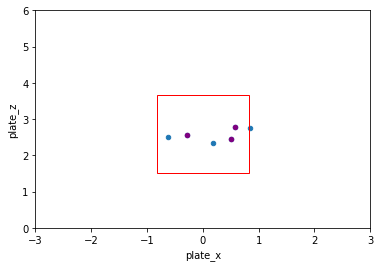


INFO FOR SL at (2.8, 100)
SL clean rate: 0.0
SL whiff rate: 0.0
SL whiffs: 0
SL called strikes: 0
SL swings: 4
SL strikes: 3
SL chances: 4


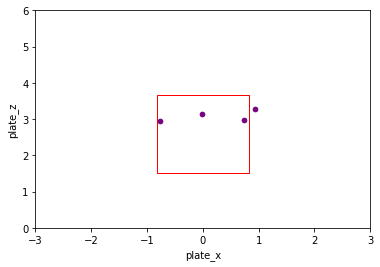

frequencies for SL by height: {(-100, 2.2): 0.8, (2.2, 2.8): 0.12, (2.8, 100): 0.08}

INFO FOR FT at (-100, 2.2)
FT clean rate: 0.16666666666666666
FT whiff rate: 0.0
FT whiffs: 0
FT called strikes: 1
FT swings: 1
FT strikes: 1
FT chances: 6


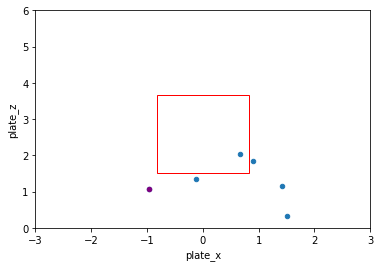


INFO FOR FT at (2.2, 2.8)
FT clean rate: 0.0
FT whiff rate: 0.0
FT whiffs: 0
FT called strikes: 0
FT swings: 4
FT strikes: 3
FT chances: 4


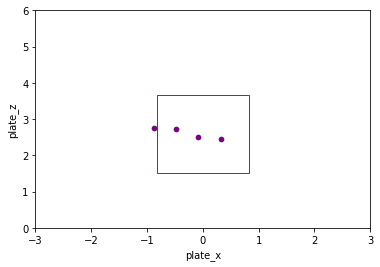


INFO FOR FT at (2.8, 100)
FT clean rate: 0.0
FT whiff rate: 0.0
FT whiffs: 0
FT called strikes: 0
FT swings: 1
FT strikes: 1
FT chances: 2


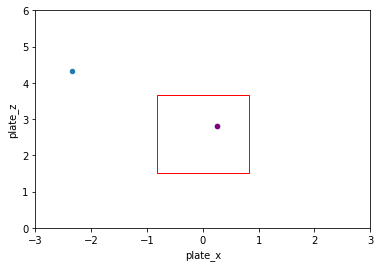

frequencies for FT by height: {(-100, 2.2): 0.5, (2.2, 2.8): 0.3333333333333333, (2.8, 100): 0.16666666666666666}


In [14]:
# exclusively 2 strikes in 2019
heights = [(-100, 2.2), (2.2, 2.8), (2.8, 100)]
whiff_by_height(['FF', 'CH', 'SL', 'FT'], webb_stats_2019[webb_stats_2019['strikes']==2], heights)

## Release Point Analysis
Below, I investigate the curious case of Logan Webb's release point. I use this as a proxy for understanding the repeatibility of his mechanics and as a metric he can use to measure his progress.

Webb's pitches appear to tunnel well in terms of release point, i.e. the average release points aren't distinguishable. But the spread seems big.

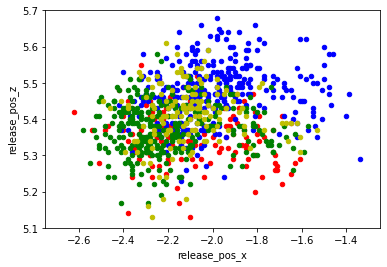

In [15]:
# plot
ax = webb_stats[webb_stats['pitch_type']=='SL'].plot(x='release_pos_x', y='release_pos_z', kind='scatter', color='r')
webb_stats[webb_stats['pitch_type']=='FF'].plot(ax=ax, x='release_pos_x', y='release_pos_z', kind='scatter', color='b')
webb_stats[webb_stats['pitch_type']=='CH'].plot(ax=ax, x='release_pos_x', y='release_pos_z', kind='scatter', color='g')
webb_stats[webb_stats['pitch_type']=='SI'].plot(ax=ax, x='release_pos_x', y='release_pos_z', kind='scatter', color='y')
plt.xlim([-2.75, -1.25])
plt.ylim([5.1, 5.7])
plt.show()

Below, I visualize the release points of each of his pitches and specifically compare them from 2020 to 2019. Red is 2020, blue is 2019.

<AxesSubplot:xlabel='release_pos_x', ylabel='release_pos_z'>

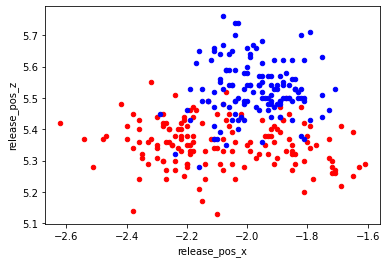

In [16]:
ax = webb_stats[webb_stats['pitch_type']=='SL'].plot(x='release_pos_x', y='release_pos_z', kind='scatter', color='r')
webb_stats_2019[webb_stats_2019['pitch_type']=='SL'].plot(ax=ax, x='release_pos_x', y='release_pos_z', 
                                                          kind='scatter', color='b')

<AxesSubplot:xlabel='release_pos_x', ylabel='release_pos_z'>

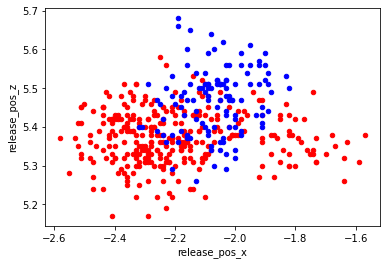

In [17]:
ax = webb_stats[webb_stats['pitch_type']=='CH'].plot(x='release_pos_x', y='release_pos_z', kind='scatter', color='r')
webb_stats_2019[webb_stats_2019['pitch_type']=='CH'].plot(ax=ax, x='release_pos_x', y='release_pos_z', 
                                                          kind='scatter', color='b')

<AxesSubplot:xlabel='release_pos_x', ylabel='release_pos_z'>

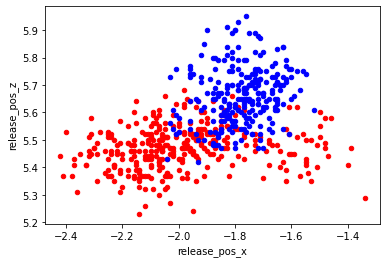

In [18]:
ax = webb_stats[webb_stats['pitch_type']=='FF'].plot(x='release_pos_x', y='release_pos_z', kind='scatter', color='r')
webb_stats_2019[webb_stats_2019['pitch_type']=='FF'].plot(ax=ax, x='release_pos_x', y='release_pos_z', 
                                                          kind='scatter', color='b')

<AxesSubplot:xlabel='release_pos_x', ylabel='release_pos_z'>

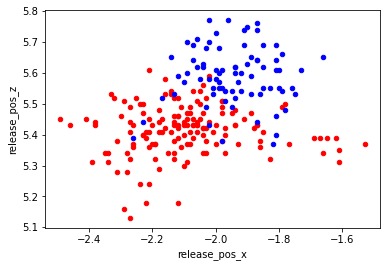

In [19]:
ax = webb_stats[webb_stats['pitch_type']=='SI'].plot(x='release_pos_x', y='release_pos_z', kind='scatter', color='r')
webb_stats_2019[webb_stats_2019['pitch_type']=='FT'].plot(ax=ax, x='release_pos_x', y='release_pos_z', 
                                                          kind='scatter', color='b')

Below, I compute the "variance" of his release point by pitch and compare from 2020 to 2019. Clearly, Webb regressed significantly in terms of this consistency which is no-doubt related to his control issues.

In [ ]:
webb_pitches = ['FF', 'CH', 'SL', 'SI']
res_webb_2020 = release_point_analysis(webb_stats, webb_pitches, '2020', webb=True)
res_webb_2019 = release_point_analysis(webb_stats_2019, webb_pitches, '2019', webb=True)
print("Logan Webb Release Point Variation, 2020 vs. 2019:\n")
for pt in res_webb_2020.index:
    print(pt + ': ' + str(res_webb_2020[pt]) + ' vs. ' + str(res_webb_2019[pt]))

In [7]:
def release_point_analysis(df, pitches, year, webb=False):
    """ Given a dataframe representing a pitcher, return the release point variance for each pitch in pitches. """
    res = {}
    print(df)
    print('\n\n\n')
    for pitch in pitches:
        res[pitch] = float('NaN')
        if webb and year == '2019' and pitch == 'SI':
            pitch = 'FT'
        if len(df[df['pitch_type']==pitch]) > 20:
            avg_x = df[df['pitch_type']==pitch]['release_pos_x'].sum()/len(
            df[df['pitch_type']==pitch])
            avg_z = df[df['pitch_type']==pitch]['release_pos_z'].sum()/len(
                df[df['pitch_type']==pitch])
            avg = np.array((avg_x, avg_z))
            rel = df[df['pitch_type']==pitch][['release_pos_x', 'release_pos_z']].values
            rel_dist = []
            for i in range(0, rel.shape[0]):
                rel_dist.append(np.linalg.norm(avg-rel[i]))
            stat = np.mean(rel_dist)
            if webb and year == '2019' and pitch == 'FT':
                pitch = 'SI'
            res[pitch]=stat
    return pd.Series(res)

In [ ]:
res_all_2020 = all_stats.groupby('pitcher').apply(release_point_analysis, pitches=webb_pitches, year='2020')
print("League Average Release Point Variation in 2020: ")
res_all_2020.mean()

Below, I take a look at how Trevor Bauer and Yu Darvish fare to get a sense of what pitchers with excellent command do. They both have pretty tight release point variation. Notably, Yu Darvish had very loose repeatibility in 2019 but tightened it up in 2020 and did significantly better outcomes-wise.

In [22]:
bauer_stats = statcast_pitcher('2020-05-01', '2020-11-01', 545333)
bauer_stats_2019 = statcast_pitcher('2019-02-01', '2019-11-01', 545333)
darvish_stats = statcast_pitcher('2020-05-01', '2020-11-01', 506433)
darvish_stats_2019 = statcast_pitcher('2019-02-01', '2019-11-01', 506433)

Gathering Player Data
Gathering Player Data
Gathering Player Data
Gathering Player Data


In [23]:
print("Trevor Bauer Release Point Variation, 2020 vs. 2019:\n")
bauer_rel_2020 = release_point_analysis(bauer_stats, ['FF', 'SL'], '2020')
bauer_rel_2019 = release_point_analysis(bauer_stats_2019, ['FF', 'SL'], '2019')
for pt in bauer_rel_2020.index:
    print(pt + ': ' + str(bauer_rel_2020[pt]) + ' vs. ' + str(bauer_rel_2019[pt]))

Trevor Bauer Release Point Variation, 2020 vs. 2019:

FF: 0.14049993494253543 vs. 0.14280930615877402
SL: 0.11553854271796524 vs. 0.12879941285761307


In [24]:
print("Yu Darvish Release Point Variation, 2020 vs. 2019:\n")
darvish_rel_2020 = release_point_analysis(darvish_stats, ['FF', 'SL'], '2020')
darvish_rel_2019 = release_point_analysis(darvish_stats_2019, ['FF', 'SL'], '2019')
for pt in darvish_rel_2020.index:
    print(pt + ': ' + str(darvish_rel_2020[pt]) + ' vs. ' + str(darvish_rel_2019[pt]))

Yu Darvish Release Point Variation, 2020 vs. 2019:

FF: 0.17409644711368238 vs. 0.28256866934270086
SL: 0.158605329250426 vs. 0.23372137741432186
